# Cats and Dogs Image Classification using CNN

This is my project for **IBM's Project-Based Learning**.  
In this project, I have built a Convolutional Neural Network (CNN) using **Keras** to classify images of **cats and dogs**.

The dataset used is from the **Kaggle competition "Dogs vs Cats"**.  
I trained the model on **2000 images (1000 cats + 1000 dogs)**, validated on 1000 images, and tested on 1000 images.

The final model achieved around **71% accuracy** on the test set.  
I also tested it on an individual image to see the prediction.

Overall, this project helped me understand how **CNNs work in image classification**.


In [43]:
import zipfile
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [44]:
original_dataset_dir = r"C:\Users\karan\Downloads\archive\train"


In [45]:
base_dir = 'cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


In [46]:
import os
print(os.listdir(r'C:\Users\karan\Downloads\archive\train'))


['cats', 'dogs']


In [47]:
import os, shutil

# Set correct path
original_dataset_dir = r'C:\Users\karan\Downloads\archive\train'

base_dir = 'cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

# Copy 1000 cat images
cat_src_dir = os.path.join(original_dataset_dir, 'cats')
fnames = os.listdir(cat_src_dir)[:1000]
for fname in fnames:
    src = os.path.join(cat_src_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy 1000 dog images
dog_src_dir = os.path.join(original_dataset_dir, 'dogs')
fnames = os.listdir(dog_src_dir)[:1000]
for fname in fnames:
    src = os.path.join(dog_src_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [48]:
# Validation directories
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

# Copy 500 cat images to validation
fnames = os.listdir(cat_src_dir)[1000:1500]
for fname in fnames:
    src = os.path.join(cat_src_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy 500 dog images to validation
fnames = os.listdir(dog_src_dir)[1000:1500]
for fname in fnames:
    src = os.path.join(dog_src_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [49]:
# Test directories
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)

# Copy 500 cat images to test
fnames = os.listdir(cat_src_dir)[1500:2000]
for fname in fnames:
    src = os.path.join(cat_src_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy 500 dog images to test
fnames = os.listdir(dog_src_dir)[1500:2000]
for fname in fnames:
    src = os.path.join(dog_src_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [50]:
print(f"Training cats: {len(os.listdir(train_cats_dir))}")
print(f"Training dogs: {len(os.listdir(train_dogs_dir))}")
print(f"Validation cats: {len(os.listdir(validation_cats_dir))}")
print(f"Validation dogs: {len(os.listdir(validation_dogs_dir))}")
print(f"Test cats: {len(os.listdir(test_cats_dir))}")
print(f"Test dogs: {len(os.listdir(test_dogs_dir))}")


Training cats: 1000
Training dogs: 1000
Validation cats: 500
Validation dogs: 500
Test cats: 500
Test dogs: 500


In [51]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'cats_and_dogs_small/train'
validation_dir = 'cats_and_dogs_small/validation'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 719ms/step - accuracy: 0.5155 - loss: 0.6905 - val_accuracy: 0.5530 - val_loss: 0.6790
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.5885 - loss: 0.6648 - val_accuracy: 0.5830 - val_loss: 0.6758
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 533ms/step - accuracy: 0.6270 - loss: 0.6413 - val_accuracy: 0.6110 - val_loss: 0.6393
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 458ms/step - accuracy: 0.6770 - loss: 0.6005 - val_accuracy: 0.6540 - val_loss: 0.6071
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 533ms/step - accuracy: 0.6865 - loss: 0.5746 - val_accuracy: 0.6890 - val_loss: 0.5819
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 523ms/step - accuracy: 0.7175 - loss: 0.5595 - val_accuracy: 0.6930 - val_loss: 0.5718
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 448ms/step - accuracy: 0.7360 - loss: 0.5384 - val_accuracy: 0.6870 - val_loss: 0.5723

In [53]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('🧪 Test accuracy:', test_acc)


Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - accuracy: 0.7040 - loss: 0.5695
🧪 Test accuracy: 0.7039999961853027


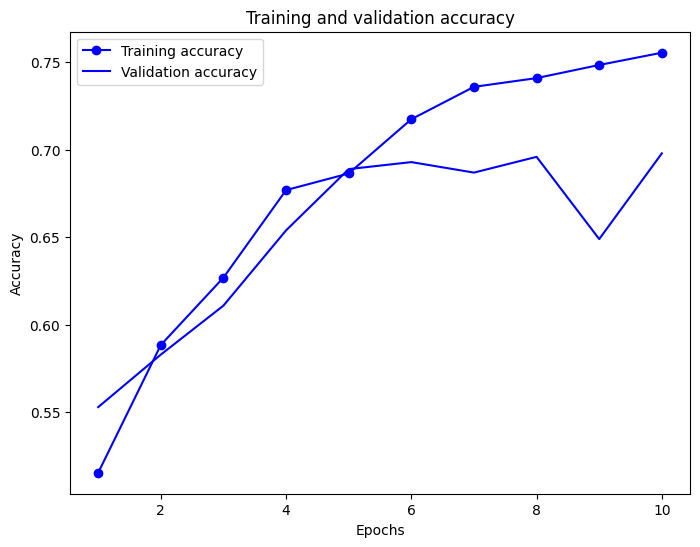

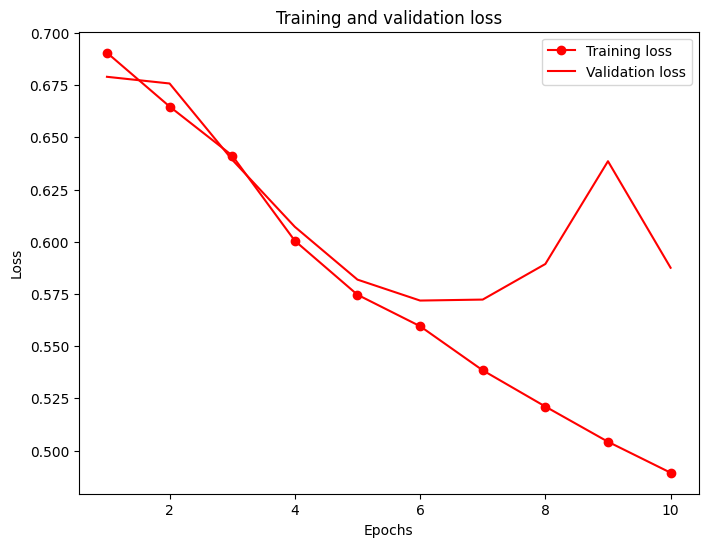

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'ro-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
import os

# Test cats images ka list dekhne ke liye
cat_test_images = os.listdir('cats_and_dogs_small/test/cats')
print("Total test cat images:", len(cat_test_images))
print("First 5 cat images:", cat_test_images[:5])


Total test cat images: 500
First 5 cat images: ['cat.11676.jpg', 'cat.11677.jpg', 'cat.11678.jpg', 'cat.11679.jpg', 'cat.11680.jpg']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Prediction (0 = Cat 🐱, 1 = Dog 🐶): 0.38177586


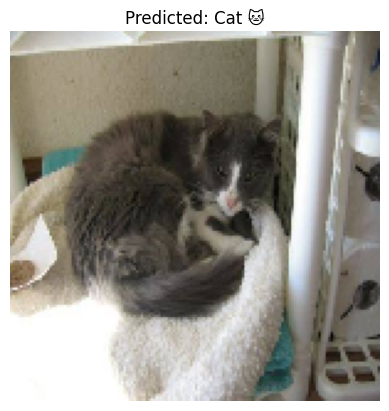

In [36]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# ✅ Yahi path tumhare system me exist karta hai
img_path = 'cats_and_dogs_small/test/cats/cat.11676.jpg'

# Image load and preprocess
img = load_img(img_path, target_size=(150, 150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Prediction
prediction = model.predict(img_tensor)
print("Prediction (0 = Cat 🐱, 1 = Dog 🐶):", prediction[0][0])

# Show image with prediction
plt.imshow(img)
plt.title("Predicted: " + ("Dog 🐶" if prediction[0][0] > 0.5 else "Cat 🐱"))
plt.axis('off')
plt.show()


In [55]:
img_path = 'cats_and_dogs_small/test/dogs/dog.11676.jpg'  # update karo actual naam se


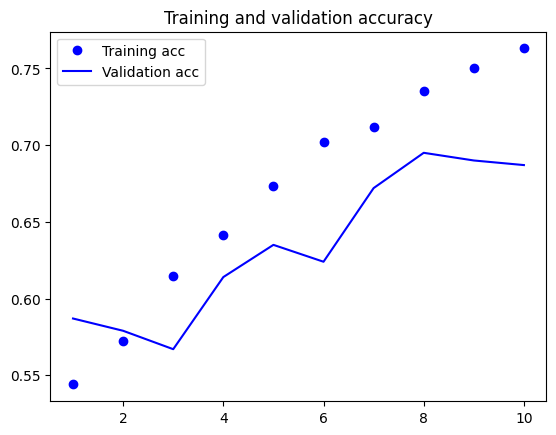

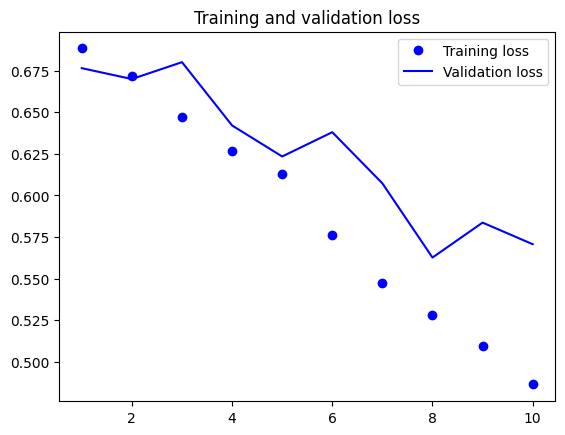

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Conclusion

This project taught me how to build and train a Convolutional Neural Network (CNN) using Keras for binary image classification.  
I learned about data preprocessing, model evaluation, and how CNNs can be applied to real-world image datasets.
